## SDP Poject 
###     AftaabAhmed Sheikh
###     Shubhadarshini Nadar
###     Aishwarya Velumani 
###     Jagjeet

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [107]:
data= pd.read_csv('investments_VC.csv',encoding='unicode_escape')

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [109]:
data.rename(columns={' market ':'market',' funding_total_usd ':'funding_total_usd'},inplace=True)

In [110]:
data.dropna(how='all',inplace=True)

# Data visualization

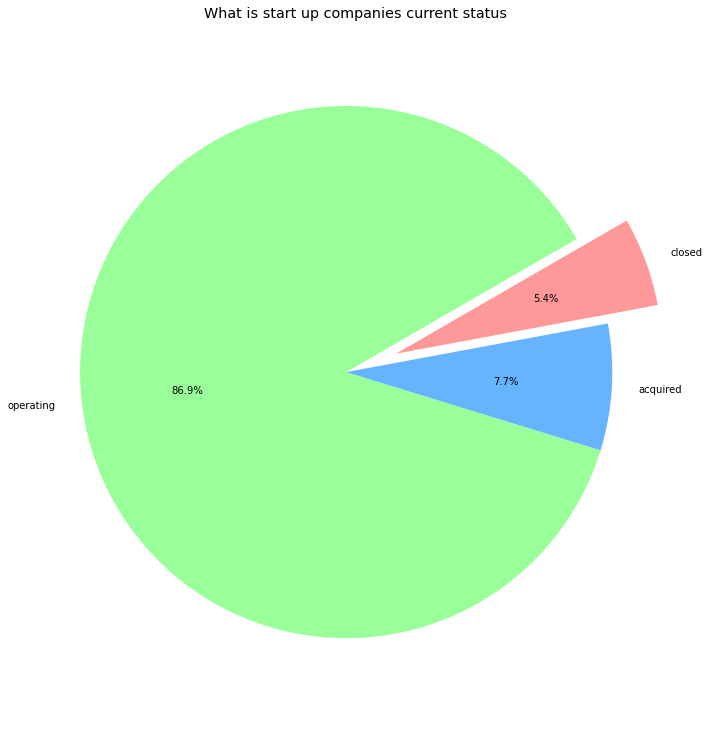

In [111]:
plt.rcParams['figure.figsize'] = 10,10
labels = data['status'].value_counts().index.tolist()
sizes = data['status'].value_counts().tolist()
explode = (0, 0, 0.2)
colors = ['#99ff99','#66b3ff','#ff9999']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=False
        , startangle=30)
plt.axis('equal')
plt.tight_layout()
plt.title("What is start up companies current status", fontdict=None, position= [0.48,1], size = 'x-large')
plt.show()

In [112]:
data['market'].value_counts()[:5]

 Software          4620
 Biotechnology     3688
 Mobile            1983
 E-Commerce        1805
 Curated Web       1655
Name: market, dtype: int64

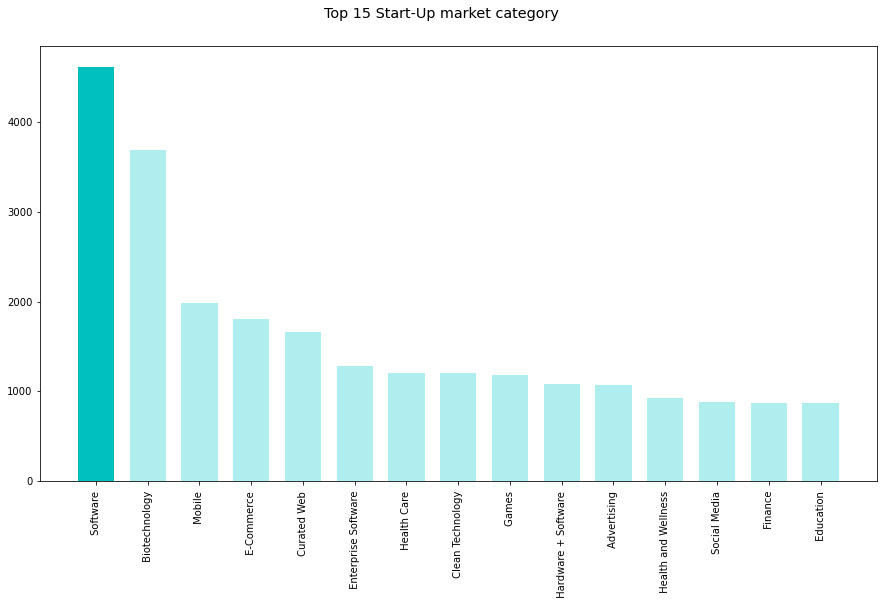

In [113]:
plt.rcParams['figure.figsize'] = 15,8

height = data['market'].value_counts()[:15].tolist()
bars =  data['market'].value_counts()[:15].index.tolist()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , width=0.7 ,color= ['c']+['paleturquoise']*14)
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)
plt.title("Top 15 Start-Up market category", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

In [114]:
data['count'] = 1
country_market = data[['count','country_code','market']].groupby(['country_code','market']).agg({'count': 'sum'})
# Change: groupby state_office and divide by sum
country_market_pct = country_market.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
country_market_pct.reset_index(inplace = True)

In [115]:
USA_market_pct = country_market_pct[country_market_pct['country_code'] == "USA"]
USA_market_pct = USA_market_pct.sort_values('count',ascending = False)[0:10]

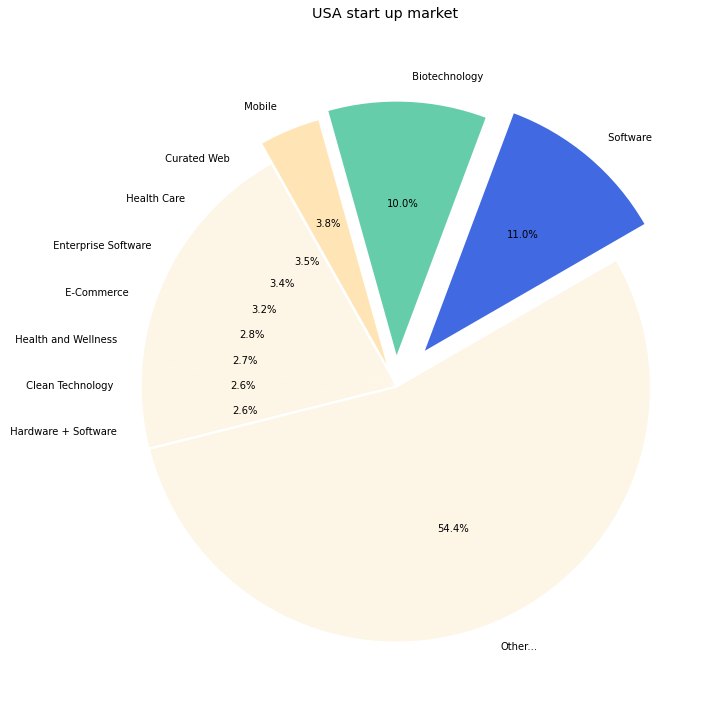

In [116]:
plt.rcParams['figure.figsize'] =10,10
labels = list(USA_market_pct['market'])+['Other...']
sizes = list(USA_market_pct['count'])+[100-USA_market_pct['count'].sum()]
explode = (0.18, 0.12, 0.09,0,0,0,0,0,0,0,0.01)
colors =  ['royalblue','mediumaquamarine','moccasin'] +['oldlace']*8

plt.pie(sizes, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=30)
plt.axis('equal')
plt.tight_layout()
plt.title("USA start up market", fontdict=None, position= [0.48,1.1], size = 'x-large')

plt.show()

In [117]:
data.drop(columns=['permalink','name','homepage_url','category_list','state_code','region','city','founded_at','founded_month','founded_quarter','founded_year','first_funding_at','last_funding_at'],axis=1,inplace=True)

In [118]:
data.head()

,market,funding_total_usd,status,country_code,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,...,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,count
0,News,"17,50,000",acquired,USA,1.0,1750000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,Games,"40,00,000",operating,USA,2.0,0.0,4000000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,Publishing,"40,000",operating,EST,1.0,40000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,Electronics,"15,00,000",operating,GBR,1.0,1500000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,Tourism,"60,000",operating,USA,2.0,0.0,0.0,60000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


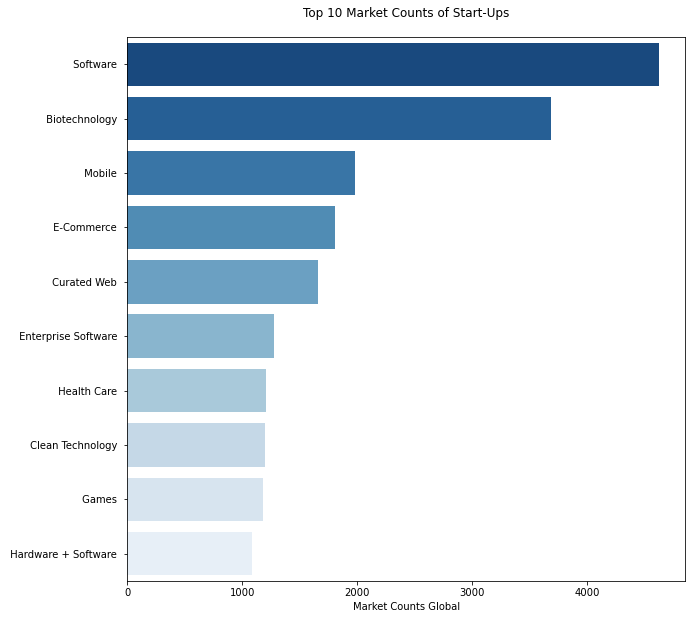

In [119]:
market=data.market.value_counts()
market[(market>1000)][0:10]
market=market[(market>1000)][0:10].to_frame()
plt.figure()
ax1=sns.barplot(y=market.index,x=market.market,orient='h',palette='Blues_r')
ax1.set_title('Top 10 Market Counts of Start-Ups',pad=20)
ax1.set_xlabel('Market Counts Global')
plt.show()

In [120]:
data.funding_total_usd=data.funding_total_usd.str.replace(",",'').str.replace(' ',"")
data.funding_total_usd=data.funding_total_usd.replace("-",np.nan).astype('float',errors='ignore')

In [121]:
data['funding_total_usd']=data['funding_total_usd'].fillna(value=0)
data['status']=data['status'].fillna(value='closed')

In [122]:
data['market']= data['market'].fillna(value='Not sure')
data['country_code']= data['country_code'].fillna(value='NA')

In [123]:
X=data.iloc[:,:]
y=data.iloc[:,2]

In [124]:
X.drop(['status'],axis=1,inplace=True)

In [125]:
X.head()

,market,funding_total_usd,country_code,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,...,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,count
0,News,1750000.0,USA,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,Games,4000000.0,USA,2.0,0.0,4000000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,Publishing,40000.0,EST,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,Electronics,1500000.0,GBR,1.0,1500000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,Tourism,60000.0,USA,2.0,0.0,0.0,60000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [126]:
y

0         acquired
1        operating
2        operating
3        operating
4        operating
           ...    
49433    operating
49434    operating
49435    operating
49436    operating
49437    operating
Name: status, Length: 49438, dtype: object

In [127]:
markets= pd.get_dummies(X['market'],drop_first=True)

In [94]:
country=pd.get_dummies(X['country_code'],drop_first=True)

In [95]:
X=pd.concat([X,markets,country],axis=1)

In [96]:
X.drop(columns=['market','country_code'],axis=1,inplace=True)

In [97]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49438 entries, 0 to 49437
Columns: 892 entries, funding_total_usd to ZWE
dtypes: float64(23), int64(1), uint8(868)
memory usage: 50.4 MB


(array([], dtype=float64), <a list of 0 Text major ticklabel objects>)

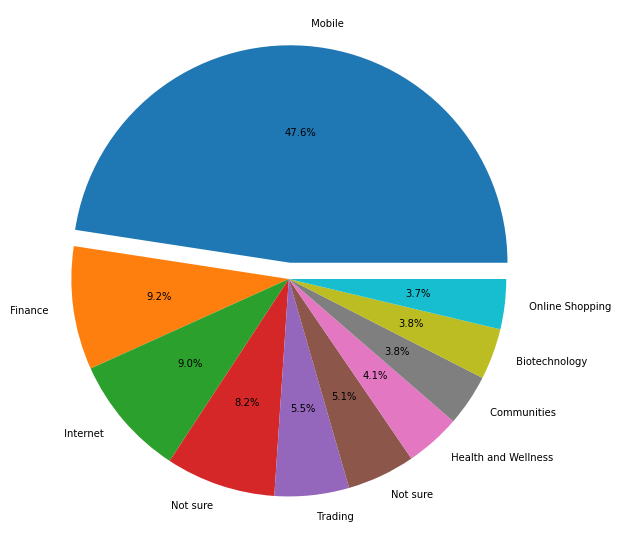

In [103]:
lar=data.nlargest(n=10,columns='funding_total_usd')
explode = (0.075,0,0,0,0,0,0,0,0,0)
plt.pie(x=lar['funding_total_usd'],explode=explode,labels=lar['market'],autopct='%1.1f%%')
plt.xticks(rotation=90)

In [23]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)

In [24]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 

In [25]:
sc=StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)
print(y_test)

23184    operating
11254    operating
35091     acquired
23796    operating
33448    operating
           ...    
23284    operating
26573    operating
30035    operating
40811    operating
15453    operating
Name: status, Length: 14832, dtype: object


In [26]:
y=y.str.replace('operating','0').str.replace('acquired','1').str.replace('closed','2')

In [28]:
y=y.astype(int)

In [29]:
y

0        1
1        0
2        0
3        0
4        0
        ..
49433    0
49434    0
49435    0
49436    0
49437    0
Name: status, Length: 49438, dtype: int32

# Support Vector

In [ ]:
cls=svm.SVC()
cls.fit(X_train,y_train)

In [31]:
y_pred= cls.predict(X_test)

In [32]:
print('accuracy :' , 100*accuracy_score(y_test, y_pred))

accuracy : 84.00755124056096


# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=0)
rf=RandomForestClassifier(criterion='entropy',n_estimators=50,random_state=0)

In [34]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [35]:
y_pred=rf.predict(X_test)
print("Random forest accuracy: ",100*accuracy_score(y_test,y_pred))

Random forest accuracy:  82.70965653950402


# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
regressor = LogisticRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

C:\Users\aftab\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [40]:
from sklearn.metrics import classification_report 
print("Classification report by Logistic Regression:")
print(classification_report(y_test,y_pred))

Classification report by Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     20850
           1       0.18      0.01      0.03      1881
           2       0.00      0.00      0.00      1988

    accuracy                           0.84     24719
   macro avg       0.34      0.34      0.31     24719
weighted avg       0.73      0.84      0.77     24719



C:\Users\aftab\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
print(accuracy_score(y_test,y_pred)*100)

84.06893482746067
